In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv', index_col='id')

In [3]:
#Train, test 쪼개기
from sklearn.model_selection import train_test_split
X = train.drop('type', axis = 1)
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [362]:
#전처리 없이 LGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=10,
                                learning_rate=0.1, n_estimators=2000, max_depth=15,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm_model.fit(X_train,y_train)
lgbm_model.score(X_test,y_test)

0.8764969124228106

In [363]:
from sklearn.metrics import log_loss
y_pred_lgbm_prob = lgbm_model.predict_proba(X_test)
log_loss(y_true=y_test, y_pred=y_pred_lgbm_prob)

0.3874938355499263

(21.5, -0.5)

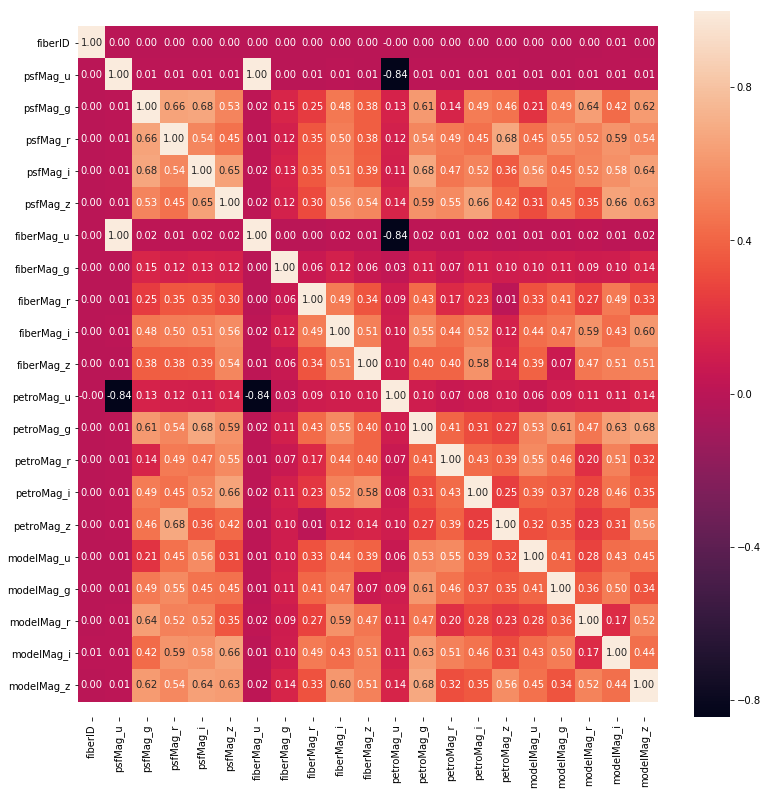

In [364]:
plt.subplots(figsize=(13,13))
ax = sns.heatmap(data=train.corr(),annot=True,fmt='.2f')
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)

In [4]:
#psfMag_u와 fiberMag_u 그리고 petroMag_u를 평균을 내서 하나의 변수로 만들기
ultra = train.loc[:,['psfMag_u','fiberMag_u','petroMag_u']]
train['average_ultra'] = ultra.apply(np.mean,axis=1)
train['average_ultra']

id
0         22.761283
1         21.553618
2         17.963531
3         20.754279
4         26.004943
            ...    
199986    20.805233
199987    26.952269
199988    24.637673
199989    20.585637
199990    20.784107
Name: average_ultra, Length: 199991, dtype: float64

In [5]:
#평균 변수를 추가하고 기존 psfMag_u와 fiberMag_u 그리고 petroMag_u 변수 삭제하기
X = pd.concat([X, train[['average_ultra']]], axis=1) 
X = X.drop(['psfMag_u','fiberMag_u','petroMag_u'],axis=1)
X

,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
id,,,,,,,,,,,,,,,,,,,
0,601,21.431953,21.314148,21.176553,21.171444,21.644453,21.657571,21.387653,21.572827,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,22.761283
1,788,20.708104,20.678850,20.703420,20.473229,21.029773,20.967054,20.937731,21.063646,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,21.553618
2,427,16.727898,16.679677,16.694640,16.641788,17.033098,16.999682,17.095999,17.076449,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,17.963531
3,864,20.040371,19.926909,19.843840,19.463270,20.317165,20.217898,20.073852,19.794505,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,20.754279
4,612,23.058767,21.471406,19.504961,18.389096,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,26.004943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,568,20.437920,20.050756,20.020974,19.959646,20.726709,20.311562,20.323418,20.211336,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,20.805233
199987,362,22.807243,21.069792,20.187531,19.595598,22.818723,20.786120,19.961857,19.457071,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,26.952269
199988,146,21.902709,20.330747,18.457535,17.326771,22.287946,20.711737,18.810560,17.721928,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,24.637673


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [44]:
#다시 LGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=10,
                                learning_rate=0.1, n_estimators=2000, max_depth=15,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm_model.fit(X_train,y_train)
lgbm_model.score(X_test,y_test)

0.8760219005475137

In [46]:
from sklearn.metrics import log_loss
y_pred_lgbm_prob = lgbm_model.predict_proba(X_test)
log_loss(y_true=y_test, y_pred=y_pred_lgbm_prob)
#살짝 좋아졌음을 확인할 수 있다.

0.38644079445636986

In [6]:
train = pd.concat([X,y],axis=1)
cols = list(train.columns)
cols = cols[-1:] + cols[:-1]
train = train[cols]
train

,type,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
id,,,,,,,,,,,,,,,,,,,,
0,QSO,601,21.431953,21.314148,21.176553,21.171444,21.644453,21.657571,21.387653,21.572827,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,22.761283
1,QSO,788,20.708104,20.678850,20.703420,20.473229,21.029773,20.967054,20.937731,21.063646,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,21.553618
2,QSO,427,16.727898,16.679677,16.694640,16.641788,17.033098,16.999682,17.095999,17.076449,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,17.963531
3,QSO,864,20.040371,19.926909,19.843840,19.463270,20.317165,20.217898,20.073852,19.794505,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,20.754279
4,STAR_RED_DWARF,612,23.058767,21.471406,19.504961,18.389096,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,26.004943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,QSO,568,20.437920,20.050756,20.020974,19.959646,20.726709,20.311562,20.323418,20.211336,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,20.805233
199987,GALAXY,362,22.807243,21.069792,20.187531,19.595598,22.818723,20.786120,19.961857,19.457071,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,26.952269
199988,STAR_RED_DWARF,146,21.902709,20.330747,18.457535,17.326771,22.287946,20.711737,18.810560,17.721928,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,24.637673


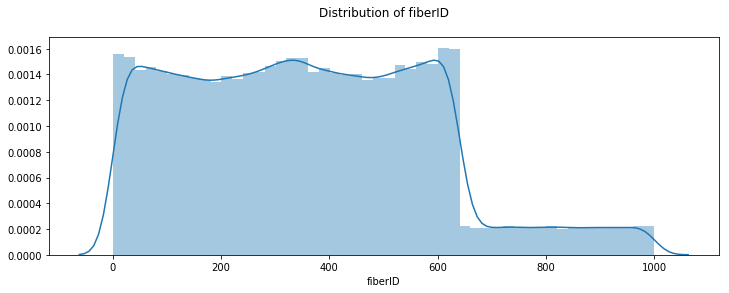

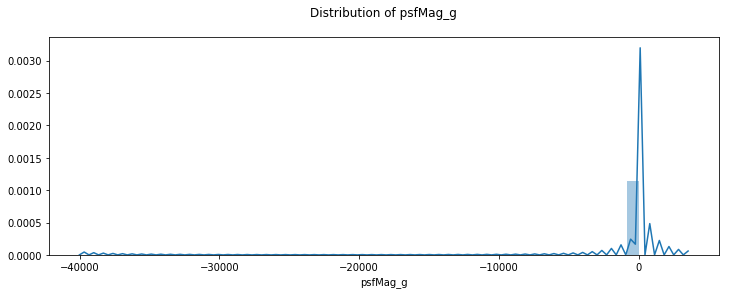

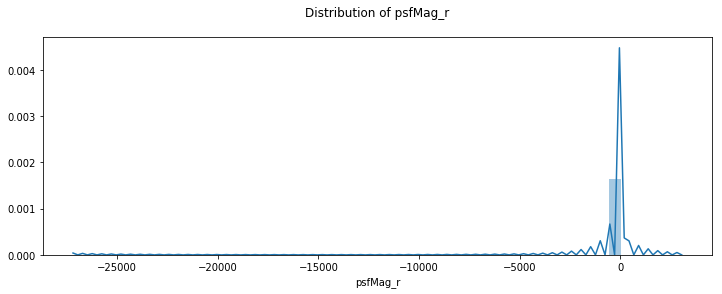

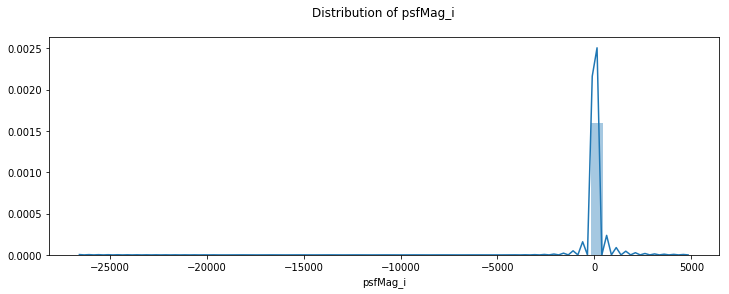

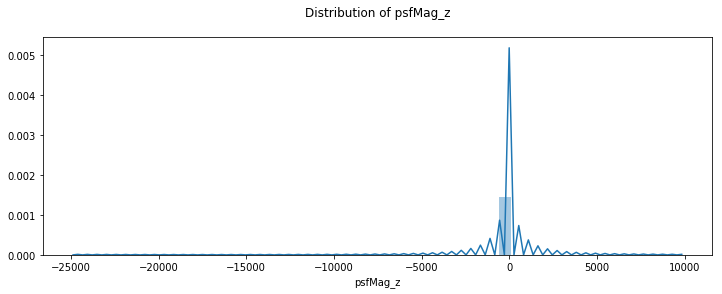

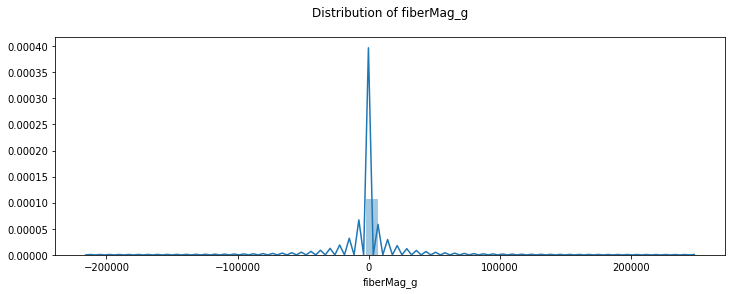

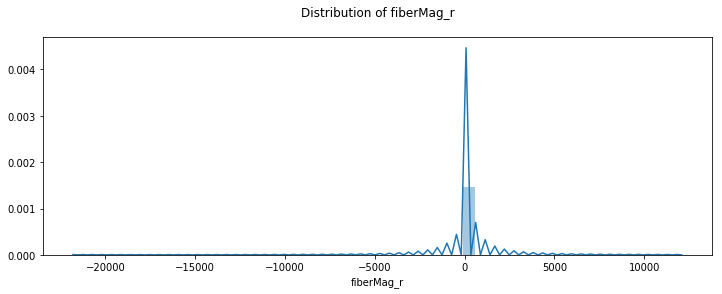

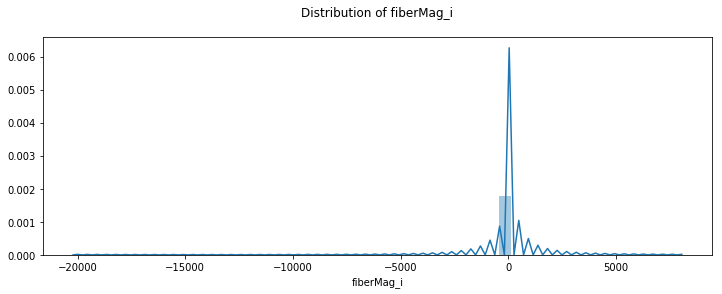

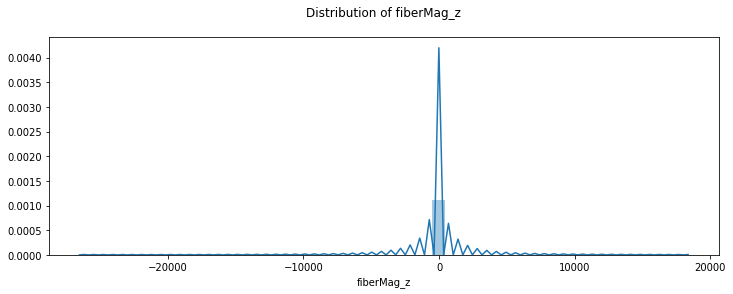

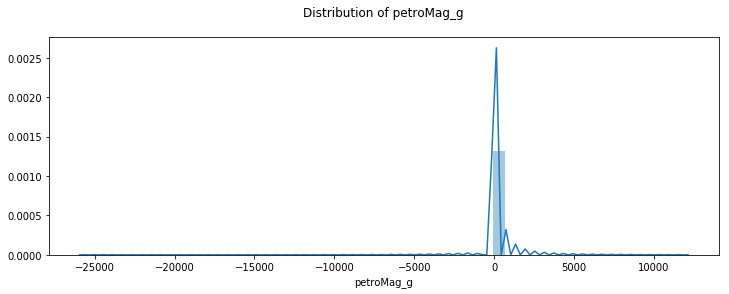

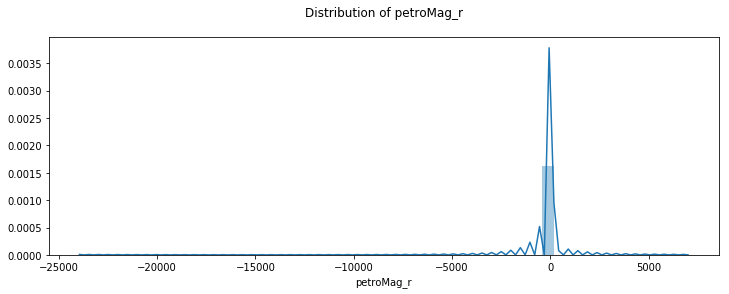

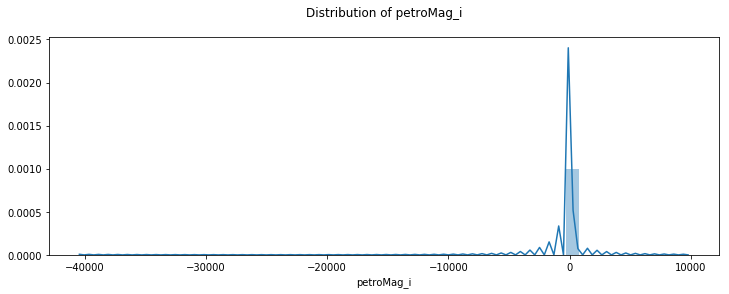

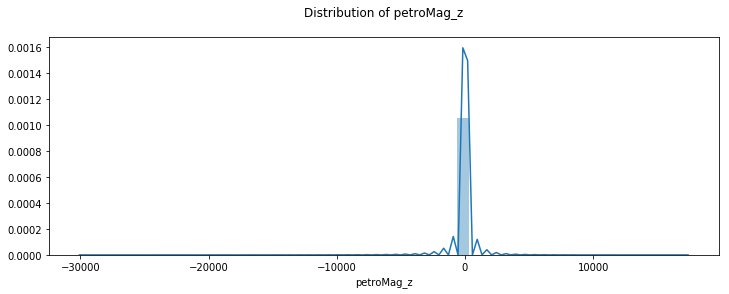

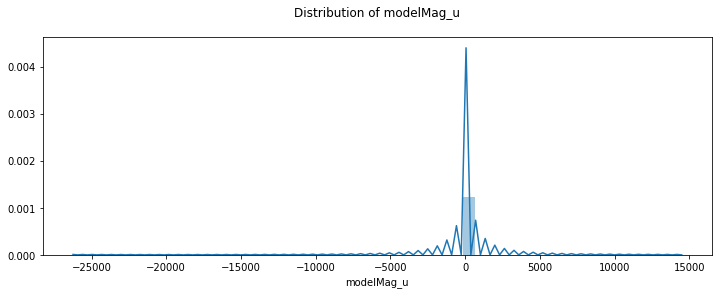

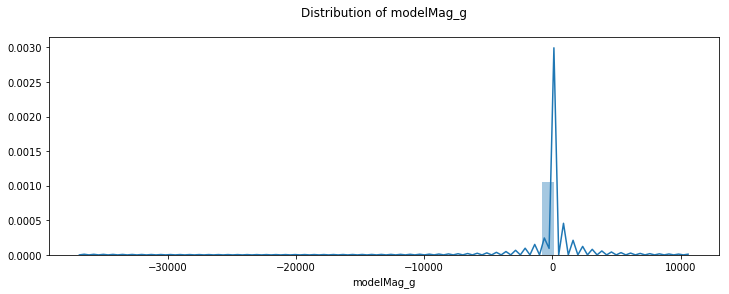

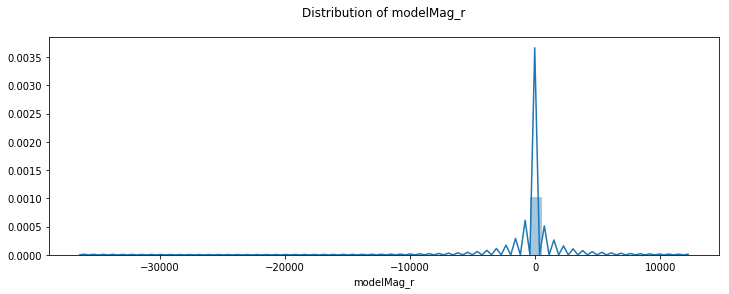

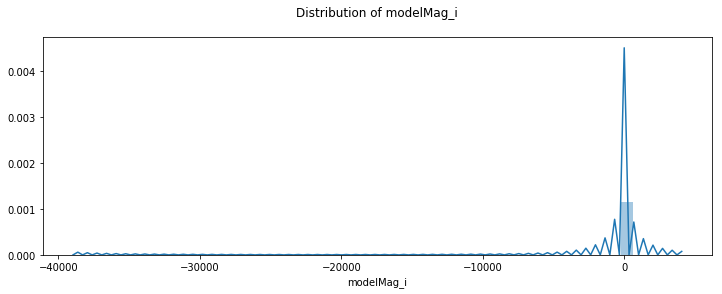

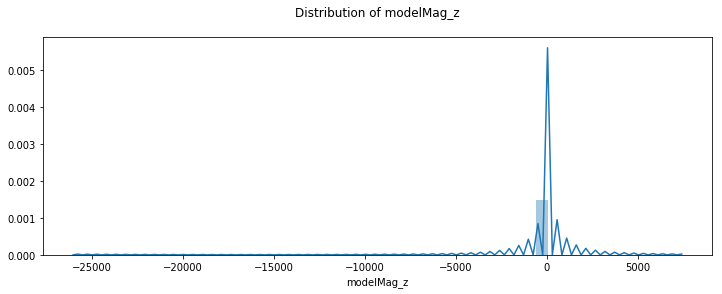

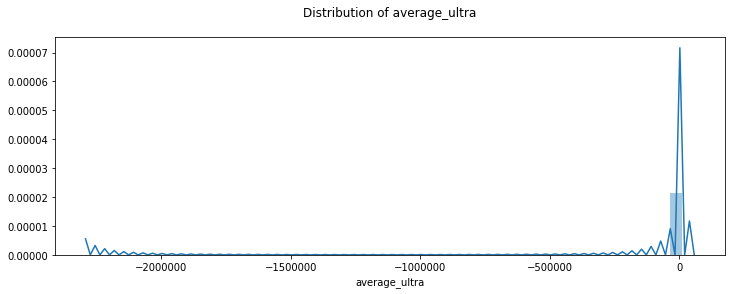

In [369]:
features = train.columns[1:]
for col in features:
     plt.figure(figsize=(12,4))
     sns.distplot(train[col])
     plt.title('Distribution of %s\n'%col)

In [77]:
temp = train.copy()
df = train.copy()
df

,type,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
id,,,,,,,,,,,,,,,,,,,,
0,QSO,601,21.431953,21.314148,21.176553,21.171444,21.644453,21.657571,21.387653,21.572827,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,22.761283
1,QSO,788,20.708104,20.678850,20.703420,20.473229,21.029773,20.967054,20.937731,21.063646,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,21.553618
2,QSO,427,16.727898,16.679677,16.694640,16.641788,17.033098,16.999682,17.095999,17.076449,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,17.963531
3,QSO,864,20.040371,19.926909,19.843840,19.463270,20.317165,20.217898,20.073852,19.794505,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,20.754279
4,STAR_RED_DWARF,612,23.058767,21.471406,19.504961,18.389096,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,26.004943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,QSO,568,20.437920,20.050756,20.020974,19.959646,20.726709,20.311562,20.323418,20.211336,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,20.805233
199987,GALAXY,362,22.807243,21.069792,20.187531,19.595598,22.818723,20.786120,19.961857,19.457071,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,26.952269
199988,STAR_RED_DWARF,146,21.902709,20.330747,18.457535,17.326771,22.287946,20.711737,18.810560,17.721928,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,24.637673


분포도를 그려보았을 때 모든 변수들이 오른쪽이나 왼쪽으로 치우쳐져 정규성의 가정에 부합하지 않는 것을 확인할 수 있다.
우선적으로는 박스 플랏을 그려서 max, min 값 밖 outlier를 전부 제거한다.

지금까지 뻘짓한것에 대한 문제점: outlier를 제거하니, 학습할 때 적은 수의 type들은 학습이 안되어서 test 셋을 돌렸을때 그것이 나오지 않는다. 그래서 log_loss를 예측할 수 없다

In [431]:
temp.groupby('type').size().sort_values(ascending=False) 

type
QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
dtype: int64

In [78]:
qso = df[df['type']=='QSO'] #가장 갯수가 많은 QSO부터 시작
qso.describe() #fiberMag만 이상한 것을 확인할 수 있다. 이친구의 outlier 먼저 제거해준다.

,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
count,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,4.968000e+04
mean,475.962540,20.844459,20.562275,20.389592,20.245893,21.771637,20.831491,20.663179,20.487626,20.875612,20.582023,20.470759,20.381006,21.711196,20.796655,20.501448,20.331913,20.205200,-2.434714e+01
std,283.314172,1.144866,1.167290,1.188138,1.370710,1475.434584,1.158578,1.187628,1.426622,2.104052,1.756144,1.646889,2.695318,1.634135,1.160741,1.169228,1.189599,1.259779,1.028438e+04
min,1.000000,8.420418,0.814350,-30.711890,-105.351185,-215882.917191,-14.662435,10.646672,-139.831165,-198.876440,-130.554426,-23.732019,-192.700406,14.379808,13.881702,13.832868,13.662449,12.235952,-2.292266e+06
25%,234.000000,20.232979,19.914293,19.725654,19.557763,20.503032,20.177854,19.970901,19.794878,20.240878,19.923213,19.727318,19.461315,20.797072,20.209107,19.894231,19.700750,19.539938,2.091746e+01
50%,464.000000,21.071196,20.773945,20.604364,20.398573,21.351912,21.046853,20.870056,20.618591,21.093457,20.782893,20.620931,20.306151,21.680015,21.044267,20.743892,20.568844,20.382068,2.178486e+01
75%,711.000000,21.646985,21.394157,21.236891,21.024761,21.934979,21.667805,21.512357,21.257899,21.684064,21.423231,21.294470,21.138621,22.477501,21.609808,21.343598,21.191318,20.998438,2.256705e+01
max,1000.000000,50.646416,50.849271,61.241476,81.345680,248077.513380,32.574603,42.002047,40.860707,270.432463,181.955644,122.271336,290.639685,39.238248,32.272511,33.666494,29.280470,48.276514,1.739849e+02


In [79]:
q1,q3 = np.percentile(qso['fiberMag_g'],[25,75])
iqr = q3-q1
lower_bound = q1 - (iqr*1.5)
upper_bound = q1 + (iqr*1.5)
qso = qso[(qso['fiberMag_g']<upper_bound)&(qso['fiberMag_g']>lower_bound)]
qso.describe()

,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
count,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,47286.000000,4.728600e+04
mean,478.965296,20.865241,20.599525,20.432860,20.295372,21.139228,20.869461,20.705671,20.537495,20.886505,20.615675,20.513924,20.430968,21.722546,20.818313,20.540412,20.378269,20.253305,-2.667231e+01
std,284.432137,0.991491,1.046942,1.084480,1.146424,0.967660,1.027858,1.073969,1.130565,1.117024,1.471667,1.550934,2.412230,1.522757,1.009358,1.045582,1.076690,1.153766,1.054151e+04
min,1.000000,11.287406,0.814350,-30.711890,7.074244,18.355912,15.371597,10.646672,3.203617,-29.679836,-130.554426,-23.732019,-167.577528,14.857191,14.817844,15.261008,14.511502,12.235952,-2.292266e+06
25%,236.000000,20.270334,19.949300,19.770406,19.612727,20.539596,20.217643,20.017915,19.844226,20.276049,19.958889,19.777236,19.513181,20.833752,20.243712,19.930313,19.747622,19.592882,2.094852e+01
50%,468.000000,21.060135,20.768220,20.612329,20.406412,21.340313,21.041096,20.878141,20.628000,21.082347,20.776788,20.628045,20.316759,21.666681,21.033363,20.736684,20.576644,20.389728,2.177314e+01
75%,718.000000,21.611292,21.368975,21.221660,21.013908,21.898589,21.643083,21.496374,21.248565,21.644220,21.399372,21.278272,21.131502,22.435647,21.572006,21.318407,21.175064,20.985115,2.252433e+01
max,1000.000000,50.646416,50.849271,61.241476,81.345680,22.650947,31.928244,35.074377,40.860707,66.058291,111.756603,122.271336,290.639685,28.911952,32.272511,33.666494,29.280470,48.276514,1.739849e+02


In [88]:
temp_no_qso = df[df['type']!='QSO']
temp_yes_qso = pd.concat([temp_no_qso, qso])
temp_yes_qso

,type,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
id,,,,,,,,,,,,,,,,,,,,
4,STAR_RED_DWARF,612,23.058767,21.471406,19.504961,18.389096,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,26.004943
5,SERENDIPITY_BLUE,76,19.315942,19.431752,19.600843,19.674611,19.661686,19.785276,19.928729,19.877216,19.390363,19.552879,19.688197,19.799425,19.899462,19.325313,19.469356,19.598653,19.677858,19.977212
7,STAR_BHB,14,15.786268,15.524910,15.500176,15.527453,16.063400,15.889851,15.834744,15.847949,15.804802,15.625482,15.569017,15.593497,17.037058,15.747645,15.556542,15.500731,15.498295,17.151519
9,STAR_CATY_VAR,38,18.315460,16.993596,15.979193,15.436727,18.656975,17.318537,16.346307,15.816406,18.369660,17.012885,16.034479,15.515003,20.621694,18.310723,16.973572,15.976650,15.446872,20.691453
12,SERENDIPITY_DISTANT,88,19.785866,20.089242,20.321493,20.652689,20.201110,20.473793,20.724340,21.113927,19.829478,20.192406,20.200493,21.982850,19.706778,19.816104,20.106453,20.307841,20.596514,19.820068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199972,QSO,192,20.292540,20.039024,19.988518,19.756245,20.600792,20.373516,20.229257,20.010304,20.160168,20.032892,19.803047,19.584360,21.810941,20.266387,19.981509,19.888308,19.888474,21.714532
199975,QSO,552,20.318907,20.094233,20.000269,20.019506,20.673347,20.380178,20.456407,20.330398,20.372792,20.056756,20.222786,20.174022,21.591079,20.315934,20.041011,19.992073,19.978690,21.677381
199980,QSO,667,20.791882,19.543156,19.098454,18.774731,21.104934,19.893325,19.439082,19.067794,20.995036,19.631403,19.056447,18.813060,25.523111,20.825949,19.573277,19.070012,18.753282,25.075049


In [93]:
spec_std = temp_yes_qso[temp_yes_qso['type']=='SPECTROPHOTO_STD'] #그 다음은 SPECTROPHOTO_STD
spec_std.describe() #fiberMag_i가 이상하다.
len(spec_std)

14630

In [92]:
q1,q3 = np.percentile(spec_std['fiberMag_i'],[25,75])
iqr = q3-q1
lower_bound = q1 - (iqr*1.5)
upper_bound = q1 + (iqr*1.5)
spec_std = spec_std[(spec_std['fiberMag_i']<upper_bound)&(spec_std['fiberMag_i']>lower_bound)]
spec_std.describe()
len(spec_std)

14511

In [94]:
temp_no_spec = temp_yes_qso[temp_yes_qso['type']!='SPECTROPHOTO_STD']
temp_yes_spec = pd.concat([temp_no_spec, spec_std])
len(temp_yes_spec)

197597

In [105]:
train_new = temp_yes_spec.reset_index()
train_new

,id,type,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
0,4,STAR_RED_DWARF,612,23.058767,21.471406,19.504961,18.389096,23.629122,21.742750,19.861718,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,26.004943
1,5,SERENDIPITY_BLUE,76,19.315942,19.431752,19.600843,19.674611,19.661686,19.785276,19.928729,...,19.390363,19.552879,19.688197,19.799425,19.899462,19.325313,19.469356,19.598653,19.677858,19.977212
2,7,STAR_BHB,14,15.786268,15.524910,15.500176,15.527453,16.063400,15.889851,15.834744,...,15.804802,15.625482,15.569017,15.593497,17.037058,15.747645,15.556542,15.500731,15.498295,17.151519
3,9,STAR_CATY_VAR,38,18.315460,16.993596,15.979193,15.436727,18.656975,17.318537,16.346307,...,18.369660,17.012885,16.034479,15.515003,20.621694,18.310723,16.973572,15.976650,15.446872,20.691453
4,12,SERENDIPITY_DISTANT,88,19.785866,20.089242,20.321493,20.652689,20.201110,20.473793,20.724340,...,19.829478,20.192406,20.200493,21.982850,19.706778,19.816104,20.106453,20.307841,20.596514,19.820068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197592,199929,SPECTROPHOTO_STD,328,16.260721,15.956639,15.798018,15.815141,16.647676,16.338717,16.193958,...,16.305077,15.988160,15.871479,15.837546,17.251506,16.249200,15.940714,15.822663,15.791979,17.386011
197593,199956,SPECTROPHOTO_STD,135,16.806950,16.544097,16.416949,16.419648,17.124156,16.862986,16.757356,...,16.847363,16.580014,16.482291,16.478887,17.772454,16.808135,16.529667,16.423727,16.405076,17.899988
197594,199967,SPECTROPHOTO_STD,202,16.995308,16.664386,16.562230,16.524183,17.267892,16.967649,16.880090,...,17.030034,16.731140,16.648142,16.598218,17.912152,16.962067,16.665223,16.567872,16.526580,18.024267
197595,199976,SPECTROPHOTO_STD,481,16.981784,16.737117,16.646501,16.634837,17.301820,17.033316,16.959054,...,17.023299,16.754417,16.679179,16.670243,17.890176,16.962337,16.726459,16.636771,16.603564,18.008345


In [106]:
# RobustScaler
from sklearn.preprocessing import RobustScaler
train_for_scaling = train_new.iloc[:,2:] #type과 fiberID 제외하고 데이터 생성
robustScaler = RobustScaler()
print(robustScaler.fit(train_for_scaling))
train_robustscaled = robustScaler.transform(train_for_scaling) #robustscaling 적용
train_robustscaled = pd.DataFrame(train_robustscaled,columns=train_for_scaling.columns)
train_robustscaled = pd.concat([train_new[['type', 'fiberID']], train_robustscaled], axis=1) 
train_robustscaled #robustscaling과 type,fiberID 합치기

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


,type,fiberID,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,average_ultra
0,STAR_RED_DWARF,612,0.747159,1.313771,0.828838,0.202386,-0.088504,1.459722,0.850222,0.281635,...,0.998099,0.845256,0.313278,0.069867,1.664744,1.266651,0.790028,0.287662,0.090924,2.149456
1,SERENDIPITY_BLUE,76,-0.775568,-0.242399,-0.007386,0.243958,0.437748,-0.164547,0.063945,0.309453,...,-0.066143,0.127923,0.339742,0.545747,-0.186445,-0.075376,0.113213,0.325059,0.510570,-0.307408
2,STAR_BHB,14,-0.951705,-1.709947,-1.609126,-1.533978,-1.259976,-1.637685,-1.500767,-1.390089,...,-1.322795,-1.200546,-1.054501,-0.860520,-1.250986,-1.331386,-1.206960,-1.051553,-0.836330,-1.459142
3,STAR_CATY_VAR,38,-0.883523,-0.658374,-1.006989,-1.326290,-1.297116,-0.575875,-0.926893,-1.177724,...,-0.423875,-0.731247,-0.896953,-0.886765,0.082156,-0.431568,-0.728858,-0.891678,-0.852901,-0.016288
4,SERENDIPITY_DISTANT,88,-0.741477,-0.047017,0.262174,0.556412,0.838144,0.056294,0.340508,0.639736,...,0.087756,0.344248,0.513141,1.275783,-0.258105,0.096926,0.328168,0.563296,0.806614,-0.371459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197592,SPECTROPHOTO_STD,328,-0.059659,-1.512681,-1.432124,-1.404842,-1.142205,-1.398483,-1.320467,-1.240968,...,-1.147461,-1.077868,-0.952125,-0.778922,-1.171232,-1.155306,-1.077341,-0.943407,-0.741688,-1.363565
197593,SPECTROPHOTO_STD,135,-0.607955,-1.285573,-1.191276,-1.136491,-0.894738,-1.203412,-1.109879,-1.007084,...,-0.957403,-0.877669,-0.745380,-0.564487,-0.977489,-0.959081,-0.878630,-0.741492,-0.544112,-1.154071
197594,SPECTROPHOTO_STD,202,-0.417614,-1.207259,-1.141960,-1.073501,-0.851944,-1.144566,-1.067838,-0.956133,...,-0.893381,-0.826549,-0.689243,-0.524588,-0.925535,-0.905039,-0.832894,-0.693069,-0.504956,-1.103416
197595,SPECTROPHOTO_STD,481,0.375000,-1.212882,-1.112141,-1.036964,-0.806645,-1.130676,-1.041461,-0.923353,...,-0.895741,-0.818676,-0.678738,-0.500506,-0.933708,-0.904945,-0.812233,-0.669924,-0.480148,-1.109906


In [107]:
from sklearn.model_selection import train_test_split
X = temp_yes_spec.drop('type', axis = 1)
y = temp_yes_spec['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [108]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=10,
                                learning_rate=0.1, n_estimators=2000, max_depth=15,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm_model.fit(X_train,y_train)
lgbm_model.score(X_test,y_test)

0.87790991902834

In [109]:
from sklearn.metrics import log_loss
y_pred_lgbm_prob = lgbm_model.predict_proba(X_test)
log_loss(y_true=y_test, y_pred=y_pred_lgbm_prob)

0.37177395507698224